### 다항 회귀 이해

지금까지 설명한 회귀는 독립변수(feature)와 종속변수(target)의 관계가 일차방정식 형태로 표현된 회귀였다.

하지만 세상의 모든 관계를 직선으로만 표현할수는 없는데, 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로만 표현되는 것을 `다항(Polynomial)회귀`라고 한다.

다항회귀를 비선형 회귀로 혼동하기 쉽다. 

> 그러나 다항 회귀는 선형 회귀라는 점을 주의해야 한다.

회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.





In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [9]:
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

In [10]:
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [14]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape  (10,)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

In [16]:
# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 이다.

다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.

하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다.

> 즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [18]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [24]:
plt.figure(figsize=(20, 8))
degrees = [1, 4, 15]

<Figure size 1440x576 with 0 Axes>


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232058 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.29386473 입니다.


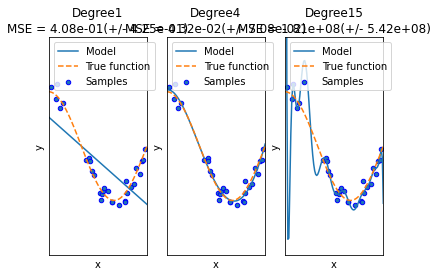

In [26]:
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.

for i in range(len(degrees)): 
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환한다
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)
  
  # 교차 검증으로 다항 회귀를 평가.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label="True function")
  plt.scatter(X, y, edgecolors='b', s=20, label="Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
  plt.title("Degree{}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()


결국 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고,

Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌,

학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 `균형잡힌(Balanced) 모델`을 의미한다.


## **편향-분산 트레이드오프(Bias-Variance Trade off)**

머신러닝이 극복해야 할 가장 중요한 이슈 중 하나, `편향-분산 트레이드오프`이다.

앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 편향된 경향이 있다. `고편향(High Bias)` 성을 가진 것.

반대로 Degree 15는 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고, 지나치게 높은 변동성을 가지게 되었다. `고분산(High Variance)` 성을 가진 것.


> 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다.

*편향과 분산이 서로 트레이드오프를 이루면서    
오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.*